In [ ]:
from PIL import Image
import numpy as np
import os
import hashlib
if os.name == "nt":
    import msvcrt
else:
    import tty
    import termios
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 as cv
import random
from math import log
import pandas
# from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [ ]:
img = cv.imread("graphs\orig.png")
encry = hashlib.sha256("123".encode("utf-8")).hexdigest()

In [ ]:
img = np.array([[122, 98, 198], [7, 249, 33], [5, 200, 112]])

a = np.array([[158, 29, 33], [20, 55, 197], [4, 244, 17]])
# print(a)
# print('-----------')
ra = np.linalg.inv(a)
# print(np.linalg.inv(ra))

# e = np.matmul(a,ra)
# print(type(e[0][0]))
# e = e.astype(np.int0)
# print(e)

img = np.matmul(img,a)
print(img)
# x = np.matmul(a,ra)
# print(x)
# x = x.astype(np.int0)
print(np.matmul(img , ra).astype(np.int0)) # 几乎不会数据错误


In [ ]:
a = np.array([[1, 1, 1], [0, 0.5, -2], [0, 1, 1]])
print(a)
print('-----------')
ra = np.linalg.inv(a)
print(ra)

print(np.matmul(a,ra))

In [ ]:
result = []
lambdas = []
maps = []

# [0,2) 间隔0.01
rvalues = np.arange(0, 2, 0.01)
# print(rvalues)
for r in rvalues:
    x = 0.1
    result = []
    # 每个r进行100轮迭代
    for t in range(100):
        x = x + r - x**2
        result.append(np.log(abs(1-2*x)))
    # res平均值
    lambdas.append(np.mean(result))
    # print("mean(result) == ",np.mean(result))
    for t in range(20):
        x = x + r - x**2
        maps.append(x)
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(0,2,4000)
# print(len(lambdas)) # 200
# print(len(maps)) # 4000
# print(maps)
zero = [0]*4000
# 绿色横线
ax1.plot(xticks,zero,'g-')
# r. 表示红色点  b-表示蓝色线
ax1.plot(xticks,maps,'r.',alpha=0.3,label='Map')
ax1.set_xlabel('r')
ax1.plot(rvalues,lambdas,'b-',linewidth = 3,label = 'Lyapunov exponent')
ax1.set_xlabel('r')

ax1.grid('on')
ax1.legend(loc = 'best')
ax1.set_title('Map of x(t+1) = x(t) + r - x(t)^2 versus Lyapunov exponent')
plt.show()

C:\Users\oarrrr\AppData\Local\Temp\ipykernel_7852\3827925602.py:14: RuntimeWarning: divide by zero encountered in log
  result.append(np.log(abs(r-2*r*x)))


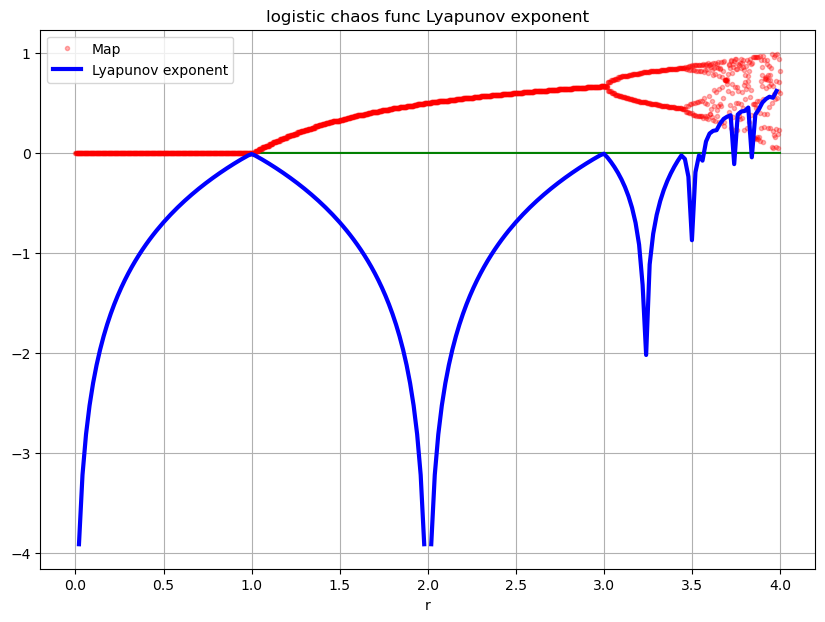

In [95]:
result = []
lambdas = []
maps = []
# u = 3.7
# [0,2) 间隔0.01
rvalues = np.arange(0, 4, 0.02)
# print(rvalues)
for r in rvalues:
    x = 0.5
    result = []
    # 每个r进行100轮迭代
    for t in range(1000):
        x = r * x * (1-x)
        result.append(np.log(abs(r-2*r*x)))
    # res平均值
    lambdas.append(np.mean(result))
    # print("mean(result) == ",np.mean(result))
    for t in range(10):
        x = r * x * (1-x)
        maps.append(x)
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(0,4,2000)
# print(len(lambdas)) # 200
# print(len(maps)) # 4000
# print(maps)
zero = [0]*2000
# 绿色横线
ax1.plot(xticks,zero,'g-')
# r. 表示红色点  b-表示蓝色线
ax1.plot(xticks,maps,'r.',alpha=0.3,label='Map')
ax1.set_xlabel('r')
ax1.plot(rvalues,lambdas,'b-',linewidth = 3,label = 'Lyapunov exponent')
ax1.set_xlabel('r')

ax1.grid('on')
ax1.legend(loc = 'best')
ax1.set_title('logistic chaos func Lyapunov exponent')
plt.show()


0.034350000000000006
theta_u ==  1.0192939980819598
theta_u ==  1.0389602545259062
theta_u ==  1.0590059516839614
theta_u ==  1.0794384104845358
theta_u ==  1.100265093106018
theta_u ==  1.121493605702053
theta_u ==  1.1431317011793984
theta_u ==  1.1651872820293812
theta_u ==  1.18766840321398
theta_u ==  1.2105832751075947
theta_u ==  1.2339402664955732
theta_u ==  1.2577479076305917
theta_u ==  1.2820148933480053
theta_u ==  1.3067500862413057
theta_u ==  1.331962519898846
theta_u ==  1.3576614022030167
theta_u ==  1.3838561186930727
theta_u ==  1.410556235992845
theta_u ==  1.4377715053045874
theta_u ==  1.4655118659702304
theta_u ==  1.4937874491013494
theta_u ==  1.5226085812791663
theta_u ==  1.551985788325942
theta_u ==  1.5819297991491317
theta_u ==  1.61245154965971
theta_u ==  1.6435621867660974
theta_u ==  1.6752730724451441
theta_u ==  1.7075957878916597
theta_u ==  1.7405421377480037
theta_u ==  1.774124154415284
theta_u ==  1.808354102447731
theta_u ==  1.84324448303186

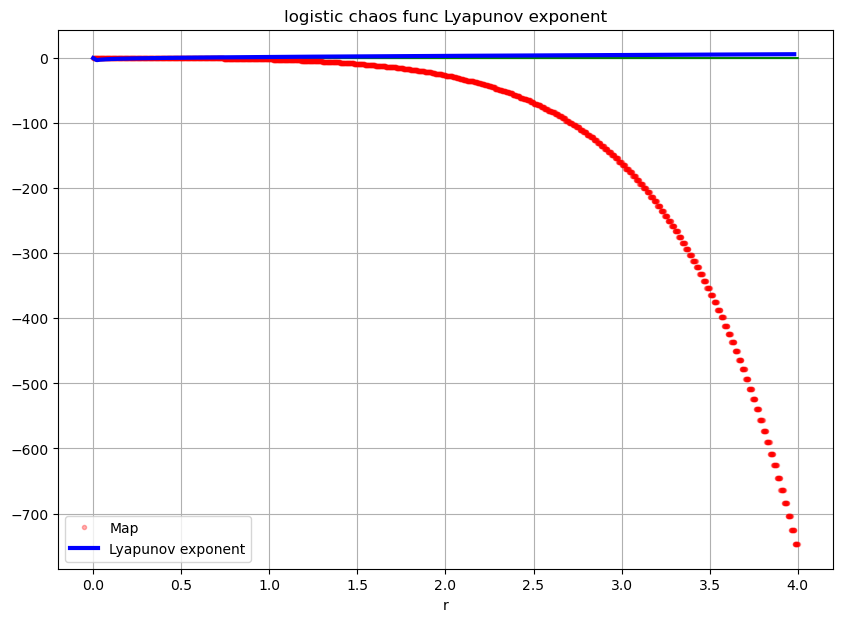

In [90]:
result = []
lambdas = []
maps = []
epsilon = 0.2 # [0,1]
theta = 2.6 # θ
u1 = 3.6
theta_u1 = pow(theta,u1)
print()
epsilon_range = np.arange(0,1,0.00001)

for ep in epsilon_range:
    if ep == 0:
        continue
    # print(abs(i - (i * (1 - i) *  theta_u1) % 1))
    if abs(ep - (ep * (1 - ep) *  theta_u1) % 1) <= 0.0001:
        epsilon = ep
        break
print(epsilon)
# u = 3.7
# [0,2) 间隔0.01
uvalues = np.arange(0, 4, 0.02)
# print(uvalues)

theta_u = pow(theta,0)
theta_ep = pow(theta,epsilon)
lastx = 0
times = 0
for u in uvalues:
    x = 0.5
    if times == 0:
        lambdas.append(u)
        for t in range(10):
            maps.append(x)
        times += 1
        continue
    else:
        lastx = uvalues[times]
        times += 1
    
    theta_u = pow(theta,u)
    print('theta_u == ',theta_u)
    df = x + theta_ep * lastx
    result = []
    # 每个r进行100轮迭代
    # error! 注意df是每一次for都变化
    for t in range(100):
        x = theta_u *df *(1 - df)
        result.append(np.log(abs(theta_u*(1-2*df))))
    # res平均值
    lambdas.append(np.mean(result))
    # print("mean(result) == ",np.mean(result))
    for t in range(10):
        x = theta_u *df *(1 - df)
        maps.append(x)


fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)
xticks = np.linspace(0,4,2000)
# print(len(lambdas)) # 200
# print(len(maps)) # 4000
# print(maps)
zero = [0]*2000
# 绿色横线
ax1.plot(xticks,zero,'g-')
# r. 表示红色点  b-表示蓝色线
ax1.plot(xticks,maps,'r.',alpha=0.3,label='Map')
ax1.set_xlabel('r')
ax1.plot(uvalues,lambdas,'b-',linewidth = 3,label = 'Lyapunov exponent')
ax1.set_xlabel('r')

ax1.grid('on')
ax1.legend(loc = 'best')
ax1.set_title('logistic chaos func Lyapunov exponent')
plt.show()